In [36]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

True

In [37]:
df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
age_list= df['Age']
print(age_list)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [39]:
age_m = df['Age'].mean()
print(f"The average passenger's age is {age_m}")

The average passenger's age is 29.69911764705882


In [40]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Questions

1. Build a bar chart showing the average age per passenger class.
2. Calculate for each gender the survival probability.

In [41]:
# Answer here


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

[![video](https://i.ytimg.com/vi/BdH0XjbsXO4/sddefault.jpg)](https://youtu.be/BdH0XjbsXO4?si=t6BMPVWyY3xrIuGE)

In [42]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True
)

In [43]:
prompt = "What is the average age of the passengers?"
agent.run(prompt)



> Entering new AgentExecutor chain...



Invoking: `python_repl_ast` with `{'query': "df['Age'].mean()"}`


29.69911764705882The average age of the passengers is approximately 29.7 years.

> Finished chain.


'The average age of the passengers is approximately 29.7 years.'

In [44]:
prompt = "What is the average passeneger age for each Pclass?"
agent.run(prompt)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby('Pclass')['Age'].mean()"}`


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64The average passenger age for each Pclass is:
- Pclass 1: 38.23
- Pclass 2: 29.88
- Pclass 3: 25.14

> Finished chain.


'The average passenger age for each Pclass is:\n- Pclass 1: 38.23\n- Pclass 2: 29.88\n- Pclass 3: 25.14'



> Entering new AgentExecutor chain...


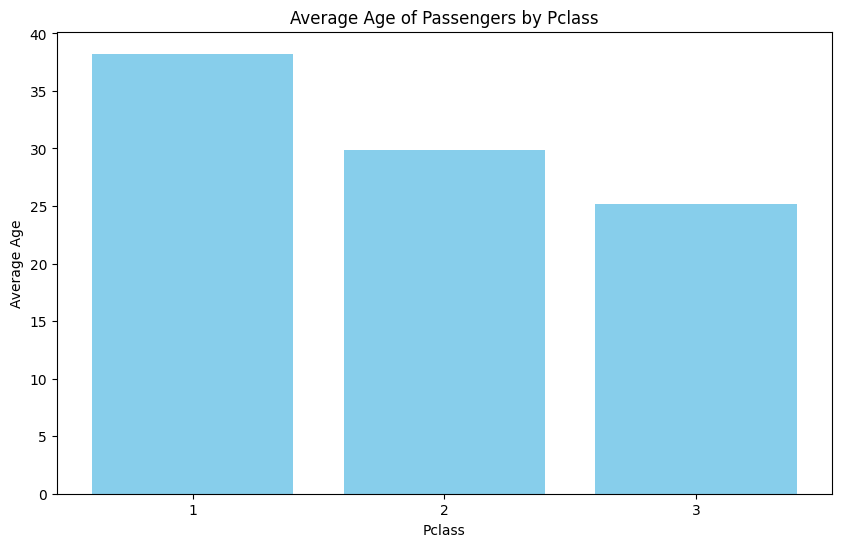


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Calculate the average age of passengers for each Pclass\naverage_age_by_pclass = df.groupby('Pclass')['Age'].mean()\n\n# Create a bar chart\nplt.figure(figsize=(10, 6))\nplt.bar(average_age_by_pclass.index, average_age_by_pclass.values, color='skyblue')\nplt.xlabel('Pclass')\nplt.ylabel('Average Age')\nplt.title('Average Age of Passengers by Pclass')\nplt.xticks(average_age_by_pclass.index)\nplt.show()"}`


Here is the bar chart showing the average age of passengers for each Pclass. 

- Pclass 1: Average Age around 38 years
- Pclass 2: Average Age around 29 years
- Pclass 3: Average Age around 25 years

This visualization helps to compare the average age of passengers across different passenger classes.

> Finished chain.


'Here is the bar chart showing the average age of passengers for each Pclass. \n\n- Pclass 1: Average Age around 38 years\n- Pclass 2: Average Age around 29 years\n- Pclass 3: Average Age around 25 years\n\nThis visualization helps to compare the average age of passengers across different passenger classes.'

In [45]:
prompt = "Build a bar chart of the average age of passengers for each Pclass."
agent.run(prompt)

In [46]:
prompt = "Were males or females more likely to survive?"
agent.run(prompt)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby('Sex')['Survived'].mean()"}`


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64Females were more likely to survive, with a survival rate of approximately 74.2%, while males had a survival rate of approximately 18.9%.

> Finished chain.


'Females were more likely to survive, with a survival rate of approximately 74.2%, while males had a survival rate of approximately 18.9%.'